# Analysis 1-3 : Never really used
## It however illustrates some preliminary visualizations

# Load the experiment data
* Using a pure Python 3 kernel for this stage

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


In [8]:
dset = np.load("spark-warehouse/numpy/e1/train-test.npz")
X_train, Y_train, X_test, Y_test = [dset[x] for x in dset.files]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(146597, 431) (146597, 1) (72205, 431) (72205, 1)


## Train a logistic regression

In [24]:
# l1 penalty means lasso
clf = LogisticRegression(fit_intercept=True, penalty='l2', solver="saga", C=1e40)
clf.fit(X_train, Y_train.reshape(Y_train.shape[0]))

/home/tengel/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1e+46, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

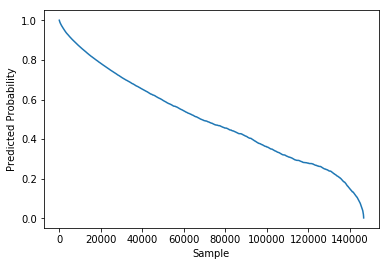

In [25]:
predictions = clf.predict_proba(X_train)
prob_true, prob_false = predictions[:,0],predictions[:,1]

#Sort the predicted value and the label together, by predicted value
ordering = (-prob_true).argsort()

prob_true[ordering]
Y_train[ordering]



prob_true[ordering]
Y_train.flatten()[ordering]


plt.clf()
plt.plot(prob_true[ordering])
plt.ylabel("Predicted Probability")
plt.xlabel("Sample")
plt.show()

(72205, 1)
(72205, 431)


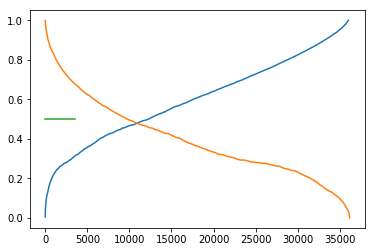

In [26]:
print(Y_test.shape)
print(X_test.shape)
test_healthyonly = X_test[(Y_test==0).flatten()]
res_healthy = clf.predict_proba(test_healthyonly)[:,0]
plt.plot(sorted(res_healthy))

test_hosponly = X_test[(Y_test==1).flatten()]
res_hosp = clf.predict_proba(test_hosponly)[:,0]
plt.plot(sorted(res_hosp, reverse=True))

plt.plot([0,3500], [0.5,0.5])
plt.show()

(72205, 1)
(72205, 431)


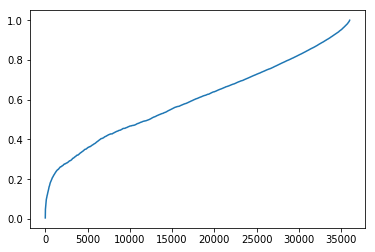

In [27]:
print(Y_test.shape)
print(X_test.shape)
test_healthyonly = X_test[(Y_test==0).flatten()]
res = clf.predict_proba(test_healthyonly)[:,0]
plt.plot(sorted(res))

In-sample mean training accuracy
0.6982475766898367
Confusion matrix
[[48735 24648]
 [19588 53626]]


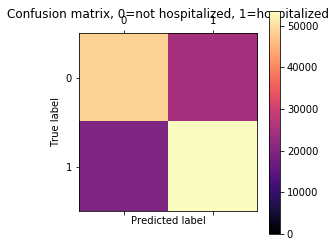

In [28]:
cm_train = confusion_matrix(Y_train, clf.predict(X_train))
print("In-sample mean training accuracy")
print(clf.score(X_train,Y_train))
print("Confusion matrix")
print(cm_train)

plt.matshow(cm_train, vmin=0, cmap=plt.get_cmap("magma"))

plt.title('Confusion matrix, 0=not hospitalized, 1=hospitalized')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

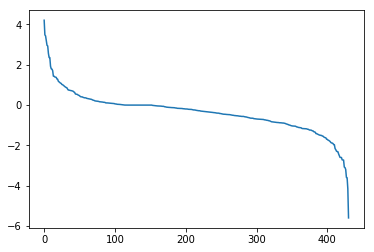

In [55]:

#print(clf.coef_[])
params = np.flip(np.sort(clf.coef_)).reshape(431)
plt.plot(params)
plt.show()

Test set mean training accuracy
0.6954781524825151
Confusion matrix
[[23814 12204]
 [ 9784 26403]]


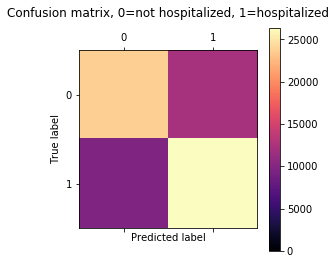

In [14]:
cm_test = confusion_matrix(Y_test, clf.predict(X_test))
print("Test set mean training accuracy")
print(clf.score(X_test,Y_test))
print("Confusion matrix")
print(cm_test)

plt.matshow(cm_test,  vmin=0, cmap=plt.get_cmap("magma"))
plt.title('Confusion matrix, 0=not hospitalized, 1=hospitalized', y=1.15)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
print(cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]))
print(cm_test[1,1]/(cm_test[1,0]+cm_test[1,1]))

0.6611694152923538
0.7296266615082765


431


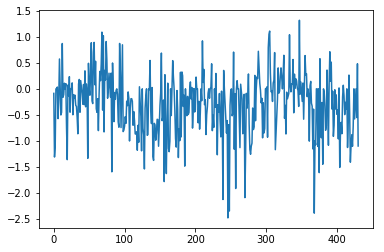

In [18]:
print(len(clf.coef_[-1]))
plt.plot(clf.coef_[-1])
plt.show()

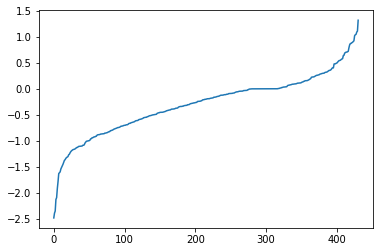

In [19]:
plt.plot(sorted(clf.coef_[-1]))

In [20]:
print(clf.intercept_)

[0.98537045]


In [22]:
print(clf.predict(np.ones((1,clf.coef_.shape[1]))))

[0.]


In [23]:
print(np.sum(Y_train.shape))

146598
